In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

from matplotlib.widgets import Slider

In [8]:
def func(q, a, L):
    return np.sin(((q*a)/2)*(L+1))/np.sin((q*a)/2)


quad(func, np.pi, 1000, args=(2,1000))

/tmp/ipykernel_15439/2511251374.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(func, np.pi, 1000, args=(2,1000))


(922.4525377318264, 1423.783562622897)

In [9]:
def func(q, a, L):
    return np.sin((q*a/2)*(L+1))/np.sin(q*a/2)

L = 20
a = 2

x = np.linspace(0, 20 , 1000000)
y = func(x, a, L)
plt.scatter(x,y, color = 'midnightblue', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

/tmp/ipykernel_15439/1656907502.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sin((q*a/2)*(L+1))/np.sin(q*a/2)


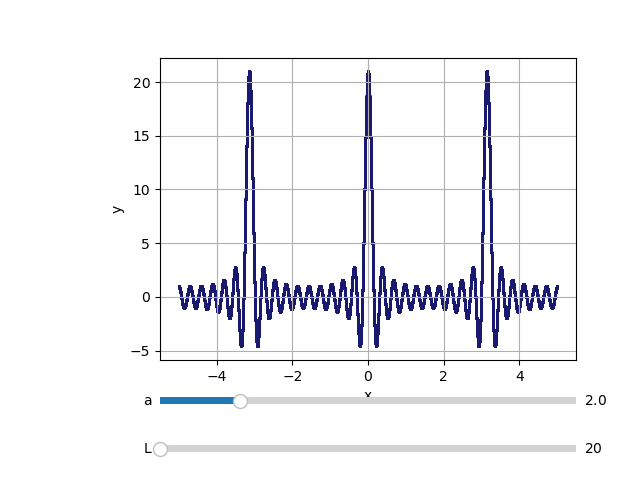

In [11]:
%matplotlib widget
def func(q, a, L):
    return np.sin((q * a / 2) * (L + 1)) / np.sin(q * a / 2)

# Initial values
L_init = 20
a_init = 2

# Create the figure and the plot
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)  # Adjust plot to fit sliders

# Generate x data
x = np.linspace(-5, 5, 1000000)  # Avoid division by zero
y = func(x, a_init, L_init)
sc = ax.scatter(x, y, color='midnightblue', s=1)

# Add labels, grid
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

# Create sliders for a and L
ax_a = plt.axes([0.25, 0.15, 0.65, 0.03])  # x-position, y-position, width, height
ax_L = plt.axes([0.25, 0.05, 0.65, 0.03])
slider_a = Slider(ax_a, 'a', 0.1, 10.0, valinit=a_init, valstep=0.1)
slider_L = Slider(ax_L, 'L', 1, 100000, valinit=L_init, valstep=1)

# Update function for sliders
def update(val):
    a = slider_a.val
    L = slider_L.val
    y = func(x, a, L)
    sc.set_offsets(np.c_[x, y])  # Update scatter plot data
    fig.canvas.draw_idle()

# Connect sliders to update function
slider_a.on_changed(update)
slider_L.on_changed(update)
plt.show()